# Neural Networks CW1

## Approach
This courswork follows the 'universal approach of machine learning' by Cholet. The approach can be assembled by the following steps:
1. Defining the problem and assembling the data
2. Choosing a measure of success
3. Defining an evaluation protocol
4. Loading the Data
5. Exploratory Data Analysis
6. Preparing the data
7. Developing a model
8. Scaling - Ovefit the Model
9. Regularize model and hyperparamter tuning

## Introduction

Based on my personal interest in digital health, the question, how to leverage medcinine often comes up. At the times of ChatGPT the term AI is present everywhere. Especially in the field of modern medicin, physicians and scientis search approaches to upscale medicine and make it more efficient. The key problem of scaling up is that one physician can take care of one patient at the time. But what would be if multiple patients could be helped at the same time. That is the point where AI comes along as all healing solution. Following this path forcibly it has to proven how trustworthy these kind of solutions are. Personally I can image that the fields of A.I. and machine learning are going to enter medicine step by step in minor fields to achieve a higher grade of automation e.g. evaluating X-ray images.


## 1. Definition of the Problem

In this coursework I would like to build a neural network to predict the presents of a heart disease. As input data serves a dataset downloaded from Kaggle. The dataset is called 'Heart Failure Prediction Dataset'. The aim is to predict, based on the given data, whether a heart disease is present. This results in the problem of binary classification. In this context, the hypothesis is: Based on the given medical observations like 'resting blood preasure' and 'chest pain type' it can be predicted if a heart disease is present.



## 2. Defining a Measure of Success

In order to evaluate the results of the model built in this notebook a measure of success needs to be defined. As mentioned in the previous section the aim is to solve a binary classification model. In dependence of the data distribution accuracy and area under the receiver operating characteristics curve (ROC, AUC) are suitable metrics.

Particularly the ROC, AUC is a good measure of success. The ROC (receiver operating characteristics curve) is a graphical representation to evaluate the binary classifier. To create the ROC the true positive rate (TPR) and false positive rate (FPR) is needed. The curve for the ROC is created by plotting TPR, FPR against each other.

An additional measure for ROC is the 'Area Under the Curve' (AUC). It measures the entire two-dimensional area under the ROC. It is measure of all possible classification tresh holds. An AUC of 1 would represent a perfect classifier while an AUC of 0.5 would represent a useless classifier.

The higher the ROC to th upper left corner, the higher is the overall accuracy. A line with a roughly 45 degree diagonal would represent a classifier with very limited discrimination ability.


## 3. Defining an evaluation protocol

Basically there a three different options to evaluate the dataset: splitting the data in a trainingset and a validation set, performing a K-fold crossvalidation or an iterated K-fold validation. Choosing the right evalution model it is important keeping the data in mind. At this point, I must anticipate the exploratory data analysis somewhat. The dataset holds 918 observation. Based on my experience so far, I would not classify that as a little data, but not a lot either. Therefore, at the current stage of the work I would tend to favour a K-fold validation instead of holding back a validation set. Based on the insights of the explorative data analysis I will decide whether I apply a K-fold validation or an iterated K-fold validation. This decision will be mainly based on the degree of required performance which is needed to perform the necessary calculations.

## 4. Loading the Dataset

In the following steps it is shown how the data is loaded. The dataset can be found in directory called 'data' in the file 'heart.csv'. The dataset was downloaded from kaggle and is called 'Heart Failure Prediction Dataset'. The corresponding link can be found in the chapter references.

In [1]:
# importing necessary libraries
import pandas as pd

In [2]:
# defining relative path to file
file= './data/heart.csv'

# read file as pandas dataframe
df= pd.read_csv(file, sep=',', header= 0) # define seperator as ',' and the position of the header

In [3]:
# validation that data was load correctly
df.head(10)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
6   45   F           ATA        130          237          0     Normal    170   
7   54   M           ATA        110          208          0     Normal    142   
8   37   M           ASY        140          207          0     Normal    130   
9   48   F           ATA        120          284          0     Normal    120   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
5              N      0.0       Up             0  
6              N      0.0       Up             0  
7              N      0.0       Up             0  
8              Y      1.5     Flat             1  
9              N      0.0       Up             0

## 5. Exploratory Data Analysis

Now that the data has been loaded, the exploratory data analysis can begin. The main aim of this analysis to gain necessary insights of the data which should help to build suitable model and inherit all other necessary methods. The amount of available observations and the number nature of features should be determined. Most import is to validate the class distribution of the data. This helps to apply measures to have a balanced data distribution when the model is trained. Otherwise there is a risk that the model is biased by the imbalanced data and can not handle correctly data from the underrepresented class.

The amount of observation can give a notice on the evaluation process that needs to apply, i.e. for a big dataset a validation set is hold back for a small dataset the use of K-fold validation would be a better fit. This will have an impact on time or performance that is required to train and validate the model. Using a K-fold validation or especially an iterated K-fold validation is in terms of performance and required calculations more expensive than having enough data to creating a validation set.

Following the feature are examined in more detail. This helps to identify if any kind of data cleaning or normalization of the data needs to be done. If the ranges of the numerical features is located in very different areas. It is beneficial to normalize the data. Later on this will improve the models performance.
Same applies for categorical data. It hase to be brought into shape that it is processable by the model.


### 5.1 Overview Columns

In [4]:
# check the columns of the dataframe
columns= df.columns
print(columns)
print(f'Number of columns: {len(columns)}')

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')
Number of columns: 12


The output of the cell above shows the columns of the data frame. In total the dataframe has 12 columns. The column 'HeartDisease' is the target column that is supposed.

In the following class distribution of the target colum will be analyzed.

### 5.2 Class Distribution

In [5]:
# Show the class distribution of the target column
df.HeartDisease.value_counts(normalize= True)

HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64

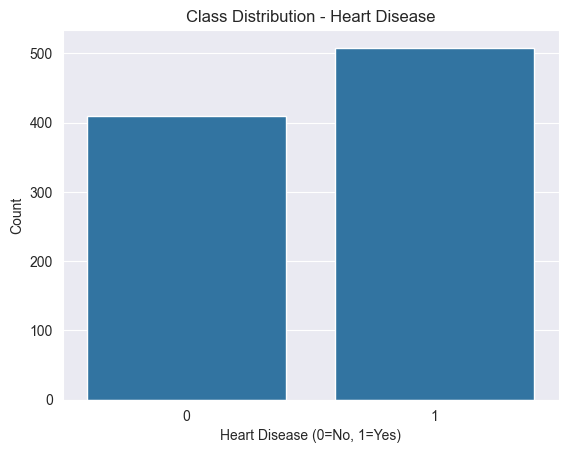

In [6]:
# import necessary libararies
import matplotlib.pyplot as plt
import seaborn as sns

# create a countplot as new figure
fig= sns.countplot(data= df, x='HeartDisease')
# set labels of the figure
fig.set_title('Class Distribution - Heart Disease')
fig.set_xlabel('Heart Disease (0=No, 1=Yes)')
fig.set_ylabel('Count')
plt.show()


The target class is distrbuted in 55% observations that related to a heart disease and 44% without heart disease. This gets quite close to an almost equal distribution. So the target class is reasonably balanced. With this slight deviation it can be considered that the class distribution will not introduce a bias to the final model.

Based on this distribution it can be determined that no resampling technique, such as oversampling or synthetic minority-sampling technique is needed to create a balance of the data.

### 5.3 Defining Evaluation Protocol and Data Distribution

This section takes a close look at the data in the dataset. This information is supposed to help to decide on an evaluation protocol. Therefore it basically can be choosen between 3 technique: 1. Holding back a validation dataset 2. Performing a k-Fold validarion or 3. Performing an iterated k-Foldvalidation.

In the followonh steps I will evaluate the amount and quality of observation. Based on this information a evalutation protocol can be defined.

In [7]:
# Showing the head of dataframe
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [8]:
# Check the quality of the data by using the info-method of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


The info-method of the Pandas datefraem prints information about the dataframe by displaying column name, Non-Null Count and the datatype of the column.
As in the call above can be seen the datasets consists of 918 observations. It can be seen that no missing or null values. Five features of the datasets are categorical features stored with datatype 'object'. The remaining columns hold numeric features. The column 'HeartDisease' represents the feature thats supposed to be predicted with datatype int64, a numeric value.

=> Reference https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

In [9]:
# shows descriptive statistics for numeric columns
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

The descriptive statistics give a good overview about the numeric columns. The first thing to look at is the average values. It can be observed that the averages lie between 0.2 and approx. 198. The columns represent a wide range of values. It can be seen that there are no zero values here either. At the same time, it can be seen that the values move within a very wide range. To prepare the data, it would be advisable to scale the data so that no value can have an unusually high influence on the model.

With regard to the evaluation protocol, it can be said that this is a moderately small data set of good quality. Due to the size of the dataset, it makes sense to work with the k-fold crossvalidation in any case. It would be even better to work with iterated k-fold validation. Since the latter method is very computationally intensive, the application depends on the computing resources available (my notebook). If the resources are not sufficient, the classic k-fold cross-validation is used.

In the next cell I will make the distribution of the data of the numerical features again in the form of boxplot diagrams. This should once again show the different value ranges.



/var/folders/s8/0n6kz3c55f9dg9x_j_m0cdk00000gn/T/ipykernel_64767/3382991793.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


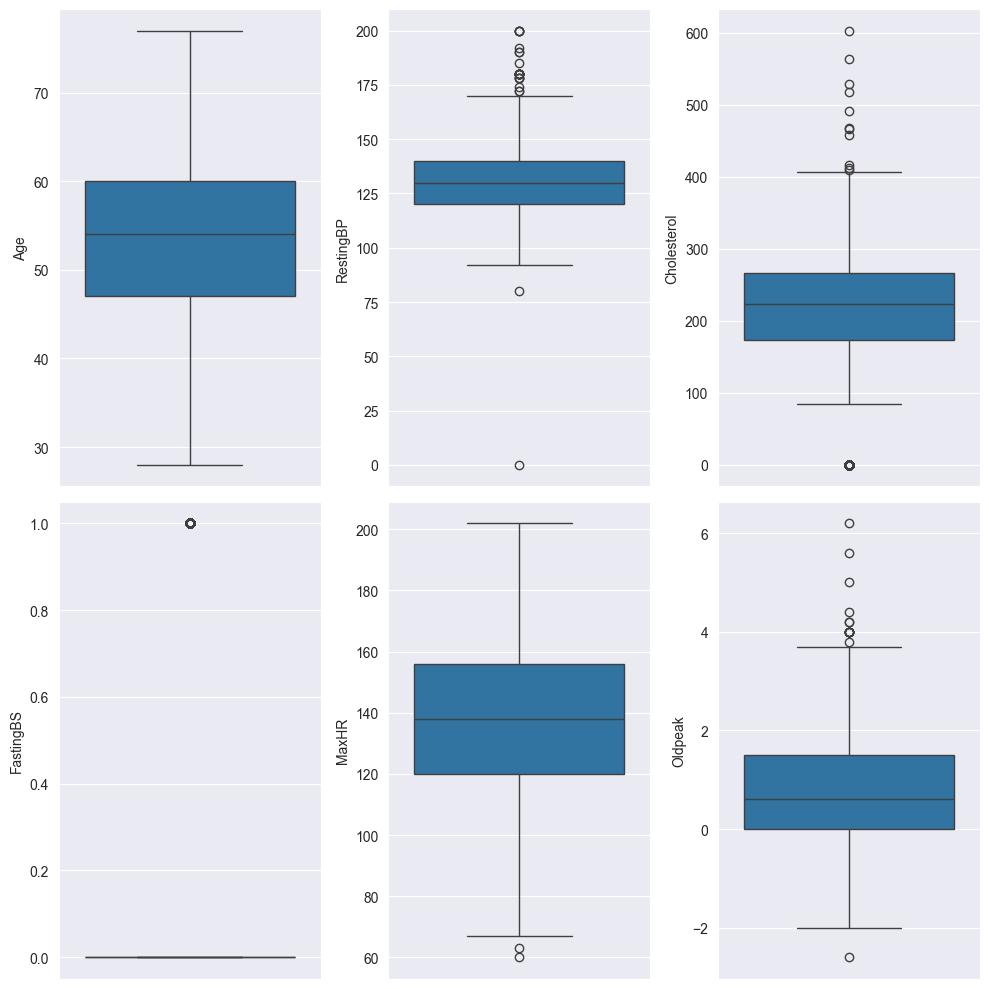

In [10]:
fig, axes= plt.subplots(2,3, figsize=(10,10))
sns.boxplot(data= df, y='Age' ,ax=axes[0,0])
sns.boxplot(data= df, y='RestingBP' ,ax=axes[0,1])
sns.boxplot(data= df, y='Cholesterol' ,ax=axes[0,2])
sns.boxplot(data= df, y='FastingBS' ,ax=axes[1,0])
sns.boxplot(data= df, y='MaxHR' ,ax=axes[1,1])
sns.boxplot(data= df, y='Oldpeak' ,ax=axes[1,2])
fig.tight_layout()
fig.show()


The boloxplot diagrams shown above illustrate the different value ranges for the individual properties. Additional they show existing outliers.

In the next steps we will take a closer look at the categorical values.

In [11]:
# create filter for categorical values
cat_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
# print head of df for categorical values
df[cat_columns].head()


Sex ChestPainType RestingECG ExerciseAngina ST_Slope
0   M           ATA     Normal              N       Up
1   F           NAP     Normal              N     Flat
2   M           ATA         ST              N       Up
3   F           ASY     Normal              Y     Flat
4   M           NAP     Normal              N       Up

The cell above shows the head of the dataframe with only categorical features. In the next I will take a look at the unique values of a categorical features.

In [12]:
# print unique values an their occurance fo all categorical data
print([df[column].value_counts() for column in cat_columns])

[Sex
M    725
F    193
Name: count, dtype: int64, ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64, RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64, ExerciseAngina
N    547
Y    371
Name: count, dtype: int64, ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64]


The list above shows all the unique values and the number of them occurring in the categorical features.

What can be seen directly and very clearly here is that female persons only make up just under 26% of the values surveyed.  This is critical insofar as the resulting model shows risks in the prediction of heart disease for women. In fact, no statement can be made for women and the model will be biased in this respect.

Since this is a student research project that focuses on the creation and evaluation of a neural network, I will continue with the data set given here. Even without using a sampling method to represent women better or more evenly. That would go beyond the scope of this paper.

It should also be noted that the categorical data cannot be processed by a neural network in this way. The data must be processed in such a way that it is represented in numerical form.

### Summary Explorational Data Analysis

The following points were identified in the EDA:
- Equal distribution of the target classes
- No data cleaning is needed - non null-values
- The numerical values cover a very wide range -> the numeric value need to be scaled
- Categorical data represented in string values ->  must be converted into numerical values

The next section takes care of transforming the data.


## 6.  Preparing the Data

In the following steps, the data is prepared in such a way that it can be processed by a neural network.  The following steps are carried out for this:

- Splitting the data into "data" and "labels"
- Scaling of the numerical values
- Categorical values are converted into numerical values
- Transformation of the data from a pandas dataframe to a numpy array

### 6.1 Splitting the Data into "Features" Data and "Label" Data

In this section the data is splitted into data features and data labels. The data features represent the observations or features of the dataset. The data labels are the target values that are supposed to be predicted by the model. At this point the data is only dvided into features and labels. A division into trainig data and test date will take place with implementation of an k-fold procedure.

In [34]:
# divide dataframe into featues and labels
df_data = df.iloc[:, :len(df.columns)-1]
df_labels= df.iloc[:,-1]

### 6.2 Scaling Numerical Values

Within in this section the numeridal features will be scaled. This operation is necessary because we have seen in the exploratory data analysis that the value ranges of the numerical values vary greatly. Scaling is therefore necessary to ensure that the model is not biased by individual properties.

In [35]:
# defining method to scale data
def scale_numeric_values(df):

    """
    Scale numeric values in a pandas DataFrame.

    This function standardizes each numeric column by subtracting the mean of the column
    and dividing by the standard deviation. It's a process known as Z-score normalization,
    which transforms the data to have a mean of 0 and a standard deviation of 1.

    Parameters:
    df (pandas.DataFrame): A DataFrame containing the data to be scaled.
                           The function identifies numeric columns (both float64 and int64 types)
                           and applies scaling to them.

    Returns:
    pandas.DataFrame: The scaled DataFrame. Numeric columns are standardized,
                      while non-numeric columns remain unchanged.
    """

    num_cols = [col for col in df_data.columns if df_data[col].dtype in ['int64','float64']]

    for col in num_cols:
        df[col]= (df[col] - df[col].mean()) / df[col].std()

    return df

In [36]:
# checking dataframe before scaling
df_data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  
0              N      0.0       Up  
1              N      1.0     Flat  
2              N      0.0       Up  
3              Y      1.5     Flat  
4              N      0.0       Up

In [37]:
# method call to scale numeric values
df_data= scale_numeric_values(df_data)
# check scaled values
df_data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0 -1.432359   M           ATA   0.410685     0.824621  -0.551041     Normal   
1 -0.478223   F           NAP   1.490940    -0.171867  -0.551041     Normal   
2 -1.750404   M           ATA  -0.129442     0.769768  -0.551041         ST   
3 -0.584238   F           ASY   0.302660     0.138964  -0.551041     Normal   
4  0.051853   M           NAP   0.950812    -0.034736  -0.551041     Normal   

      MaxHR ExerciseAngina   Oldpeak ST_Slope  
0  1.382175              N -0.831979       Up  
1  0.753746              N  0.105606     Flat  
2 -1.524307              N -0.831979       Up  
3 -1.131539              Y  0.574398     Flat  
4 -0.581664              N -0.831979       Up

In [38]:
# check descriptive stats
df_data.describe()

Age     RestingBP   Cholesterol     FastingBS         MaxHR  \
count  9.180000e+02  9.180000e+02  9.180000e+02  9.180000e+02  9.180000e+02   
mean  -1.393221e-16  2.031781e-16  3.096047e-17  4.644070e-17  5.263280e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.704540e+00 -7.151097e+00 -1.817444e+00 -5.510410e-01 -3.016825e+00   
25%   -6.902531e-01 -6.695696e-01 -2.335765e-01 -5.510410e-01 -6.602179e-01   
50%    5.185271e-02 -1.294423e-01  2.212426e-01 -5.510410e-01  4.676419e-02   
75%    6.879435e-01  4.106850e-01  6.234947e-01 -5.510410e-01  7.537463e-01   
max    2.490201e+00  3.651449e+00  3.695238e+00  1.812770e+00  2.560478e+00   

            Oldpeak  
count  9.180000e+02  
mean   1.083616e-16  
std    1.000000e+00  
min   -3.269699e+00  
25%   -8.319789e-01  
50%   -2.694280e-01  
75%    5.743984e-01  
max    4.981047e+00

The descriptive statistics of the numeric values in the dataframe shows that most of the means are equal zero or close to zero. This is a direct result of the scaling process. It shows that the data is centered around the mean. The standard deviation of all columns is shown as one. All numeric features share a common numeric scale without distorting differences in the numeric ranges. The uniform scale makes the features more comparable and potentially improves the performance of the model.

### 6.3 One Hot Encoding for Categorical Features

In the following section a so called 'one hot encoding' for the categorical data is performed. This is necessary hence the neurol network can only process numerical values.

In [43]:
# import NumPy for following operations
import numpy as np

def one_hot_encoding(df):

    """
    Perform one-hot encoding on categorical columns in a pandas DataFrame.

    This function identifies all columns with datatype 'object' as categorical.
    For each unique value in these categorical columns, it creates a new binary column
    in the DataFrame where 1 represents the presence of the unique value and 0 represents its absence.

    Parameters:
    df (pandas.DataFrame): The DataFrame on which one-hot encoding will be performed.
                           It should contain one or more columns with datatype 'object' for categorical data.

    Returns:
    pandas.DataFrame: A modified DataFrame with original categorical columns replaced
                      by their respective one-hot encoded binary columns.
    """
    # identify in categorical columns in the data frame
    cat_columns = [col for col in df.columns if df[col].dtype in ['object', 'categorical']]

    # iterate over each identified categorical column
    for cat_col in cat_columns:
        # get the unique values of each categorical column
        unique_values= df[cat_col].unique()
        # iterate over  each unique value
        for unique_val in unique_values:
            # create a new column for each unique value of the categorical column
            # new column name is combination of original column name and unique value
            df[str(cat_col)+'_'+str(unique_val)]= df[df[cat_col]==unique_val][cat_col]
            # in the new column replace the occurance of the unique value with 1
            df[str(cat_col)+'_'+str(unique_val)]= df[str(cat_col)+'_'+str(unique_val)].replace(unique_val, 1)
            # in the new column replace NaN values witj '0' indicating absence of the value
            df[str(cat_col)+'_'+str(unique_val)]= df[str(cat_col)+'_'+str(unique_val)].replace(np.NAN, 0)

        # drop the original column from the datafram
        df= df.drop(cat_col, axis= 1)

    # return the new dataframe
    return df

In [45]:
df_data= one_hot_encoding(df_data)
df_data.head(10)

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  Sex_M  \
0 -1.432359   0.410685     0.824621  -0.551041  1.382175 -0.831979    1.0   
1 -0.478223   1.490940    -0.171867  -0.551041  0.753746  0.105606    0.0   
2 -1.750404  -0.129442     0.769768  -0.551041 -1.524307 -0.831979    1.0   
3 -0.584238   0.302660     0.138964  -0.551041 -1.131539  0.574398    0.0   
4  0.051853   0.950812    -0.034736  -0.551041 -0.581664 -0.831979    1.0   
5 -1.538374  -0.669570     1.281725  -0.551041  1.303621 -0.831979    1.0   
6 -0.902283  -0.129442     0.349232  -0.551041  1.303621 -0.831979    0.0   
7  0.051853  -1.209697     0.084111  -0.551041  0.203871 -0.831979    1.0   
8 -1.750404   0.410685     0.074969  -0.551041 -0.267450  0.574398    1.0   
9 -0.584238  -0.669570     0.778910  -0.551041 -0.660218 -0.831979    0.0   

   Sex_F  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_ASY  \
0    0.0                1.0                0.0                0.0   
1    1.0                0.0                1.0                0.0   
2    0.0                1.0                0.0                0.0   
3    1.0                0.0                0.0                1.0   
4    0.0                0.0                1.0                0.0   
5    0.0                0.0                1.0                0.0   
6    1.0                1.0                0.0                0.0   
7    0.0                1.0                0.0                0.0   
8    0.0                0.0                0.0                1.0   
9    1.0                1.0                0.0                0.0   

   ChestPainType_TA  RestingECG_Normal  RestingECG_ST  RestingECG_LVH  \
0               0.0                1.0            0.0             0.0   
1               0.0                1.0            0.0             0.0   
2               0.0                0.0            1.0             0.0   
3               0.0                1.0            0.0             0.0   
4               0.0                1.0            0.0             0.0   
5               0.0                1.0            0.0             0.0   
6               0.0                1.0            0.0             0.0   
7               0.0                1.0            0.0             0.0   
8               0.0                1.0            0.0             0.0   
9               0.0                1.0            0.0             0.0   

   ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Up  ST_Slope_Flat  \
0               1.0               0.0          1.0            0.0   
1               1.0               0.0          0.0            1.0   
2               1.0               0.0          1.0            0.0   
3               0.0               1.0          0.0            1.0   
4               1.0               0.0          1.0            0.0   
5               1.0               0.0          1.0            0.0   
6               1.0               0.0          1.0            0.0   
7               1.0               0.0          1.0            0.0   
8               0.0               1.0          0.0            1.0   
9               1.0               0.0          1.0            0.0   

   ST_Slope_Down  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  
5            0.0  
6            0.0  
7            0.0  
8            0.0  
9            0.0

In the output of the previous cell can be seen that all categorical columns were replaced wit new columns for each unique value indicating with ones and zeros the presence or absence of the value.

### 6.4 Transforming Dataframe into NumPy Array

At this point the final step is missing. After scaling and transforming the data it is time change the data to make it for the neural network readable. Currently the data is in form of a pandas dataframe. To be processed by a neural network the pandas dataframe will be changed into matrix format as a 2 dimensional numpy array.

In [49]:
# import numpy library
import numpy as np

data= df_data.to_numpy()
labels= df_labels.to_numpy()

print(f'Shape of features: {data.shape}; Dimensions: {data.ndim}')
print(f'Shape of features: {labels.shape}; Dimensions: {data.ndim}')

Shape of features: (918, 20); Dimensions: 2
Shape of features: (918,); Dimensions: 2


# 7 Developing a Model

In this section a baseline model is build, trained and evaluated. In order to increase the efficiency in this work the steps of building, training the model are encapsulated into methods called 'build_model()', 'train_binary_model()' and 'plot_ROC. Finally a method is provided to print the ROC. The aim of this approach is to reuse these building blocks in latter parts of the report. Especially to over fit the model this methods can be used to create and train models easily.

In [127]:
# import libraries to build model
from tensorflow.keras import models
from tensorflow.keras import layers

In [242]:
def build_model(input_shape, num_neurons= 32, activation='relu', n_hidden_layers= 1):

    """
    Constructs and compiles a Sequential neural network model for binary classification.

    This function builds a deep learning model with a specified number of hidden layers, neurons per layer,
    and activation function. The model is designed for binary classification tasks, with a single output
    neuron using the sigmoid activation function. The model is compiled with the Adam optimizer and binary
    crossentropy loss function.

    Parameters:
    input_shape (int): The number of features in the input dataset. This specifies the number of neurons in the input layer.
    num_neurons (int, optional): The number of neurons in each hidden layer. Defaults to 32.
    activation (str, optional): The activation function to use for each hidden layer. Defaults to 'relu'.
    n_hidden_layers (int, optional): The number of hidden layers in the network. Defaults to 1.

    Returns:
    keras.engine.sequential.Sequential: A compiled Keras Sequential model ready for training.
    """

    # initialize the model
    model= models.Sequential()
    # define an input layer for the model
    model.add(layers.Dense(num_neurons, activation= activation, input_shape=(input_shape, )))

    for layer in range(n_hidden_layers):
        model.add(layers.Dense(num_neurons, activation=activation))

    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        loss= 'binary_crossentropy',
        optimizer= 'adam',
        metrics= ['accuracy']

    )
    return model

# Reference for model.compile https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/

In [243]:
model= build_model(input_shape= data.shape[1], n_hidden_layers=3)

In [244]:
model.summary()

Model: "sequential_284"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3002 (Dense)          (None, 32)                672       
                                                                 
 dense_3003 (Dense)          (None, 32)                1056      
                                                                 
 dense_3004 (Dense)          (None, 32)                1056      
                                                                 
 dense_3005 (Dense)          (None, 32)                1056      
                                                                 
 dense_3006 (Dense)          (None, 1)                 33        
                                                                 
Total params: 3873 (15.13 KB)
Trainable params: 3873 (15.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [245]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def train_binary_model(num_folds, data, labels, model ,epochs=20, batch_size= 1, verbose= 1):
    """
    Train a model using K-fold cross-validation and return the ROC curve metrics, AUC scores, and validation score.

    This function trains a model on a dataset using K-fold cross-validation.
    It splits the data into training and validation sets, builds and trains the model,
    and then evaluates it on the validation set. The function calculates the ROC AUC scores
    and ROC curve metrics for each fold and returns these metrics along with the final validation score.

    Parameters:
        - num_folds (int): Number of folds to use in the K-fold cross-validation.
        - data (array-like): The input features to train the model.
        - labels (array-like): The target labels for the input data.
        - epochs (int, optional): The number of epochs to train the model. Defaults to 20.
        - batch_size (int, optional): The size of the batches for training the model. Defaults to 1.
        - verbose (int, optional): Verbosity mode for training the model. Defaults to 1.

    Returns:
        - arr_roc (list): A list of tuples containing false positive rates, true positive rates,
        and thresholds for each fold.
        - auc_scores (list): A list of AUC scores for each fold.
        - val_score (float): The validation score from the last fold of the cross-validation.
    """

    auc_scores= []
    arr_roc= []
    model_hostories= []

    # initialize k-fold
    kf= KFold(n_splits= num_folds, shuffle= True, random_state= 42)

    for train_index, val_index in kf.split(data):
        data_train, data_validation = data[train_index], data[val_index]
        labels_train, labels_validation= labels[train_index], labels[val_index]


        model= model

        # train model
        history = model.fit(
            data_train,
            labels_train,
            epochs=epochs,
            batch_size= batch_size,
            verbose= verbose
        )

        model_hostories.append(history)

        probs= model.predict(data_validation)

        auc = roc_auc_score(labels_validation, probs)
        auc_scores.append(auc)

        fpr, tpr, thresholds= roc_curve(labels_validation, probs)

        arr_roc.append((fpr, tpr, thresholds))

        # Print the validation score
        val_score = model.evaluate(data_validation, labels_validation)
        print(f'Validation Score {val_score}')

    return arr_roc, auc_scores, val_score, history

In [241]:
def plot_roc(n_fold, arr_fold, auc_score):

    """
    Plots the Receiver Operating Characteristic (ROC) curve for a given fold of a cross-validation process.

    This function creates and displays a ROC curve, which is a graphical representation of the trade-off
    between the true positive rate and false positive rate for a classifier. The area under the curve (AUC)
    score is also displayed as part of the plot. The plot helps in visualizing the performance of the
    classification model at various threshold settings.

    Parameters:
    n_fold (int): The index of the current fold in a cross-validation process. It is used for display purposes in the plot title.
    arr_fold (list or array): A list or array containing the false positive rates and true positive rates.
                              It is expected to have a structure like [fpr, tpr], where fpr is an array of false positive rates
                              and tpr is an array of true positive rates.
    auc_score (float): The area under the ROC curve score, which quantifies the overall performance of the model.
                       A higher AUC score indicates better model performance.

    Returns: N/A

    """

    # Plotting ROC curve for current fold
    plt.figure()
    plt.plot(arr_fold[0], arr_fold[1], label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - Fold {n_fold + 1}')
    plt.legend(loc="lower right")
    plt.show()


After defining all necessary methods. It can be started to build a baseline model. The purpose of the model is to build binary classification model with statistical power. If the model achieves an accuracy of 50%, then it is no better than a guess. If the model can achieve an accuracy of more than 50%, it is better than a random decision.

Following approach is applied:
1. Build the model with corresponding parameters (e.g. number of hidden layer)
2. The model is trained and validated with specific values (e.g. epochs= 20, k-folds =5)
3. Plotting the ROC to evaluate model performance

In [246]:
# build a base model
# number base model hidden layers
bm_n_hidden_layers= 5
# base model k-folds
bm_k_folds= 5

# method call to build the model with defined parameters
bm_model= build_model(input_shape= data.shape[1], n_hidden_layers= bm_n_hidden_layers)
# method call to train binary model and aigning the return values to corresponding variables
bm_arr_roc, bm_auc_scores, bm_val_score, bm_history= train_binary_model(num_folds=bm_k_folds, data= data, labels= labels, model= bm_model)

Epoch 1/20
734/734 [==============================] - 6s 2ms/step - loss: 0.4122 - accuracy: 0.8297
Epoch 2/20
734/734 [==============================] - 1s 2ms/step - loss: 0.3370 - accuracy: 0.8719
Epoch 3/20
734/734 [==============================] - 1s 2ms/step - loss: 0.3144 - accuracy: 0.8706
Epoch 4/20
734/734 [==============================] - 1s 2ms/step - loss: 0.2886 - accuracy: 0.8856
Epoch 5/20
734/734 [==============================] - 1s 2ms/step - loss: 0.2813 - accuracy: 0.8856
Epoch 6/20
734/734 [==============================] - 1s 2ms/step - loss: 0.2629 - accuracy: 0.8965
Epoch 7/20
734/734 [==============================] - 1s 2ms/step - loss: 0.2550 - accuracy: 0.9019
Epoch 8/20
734/734 [==============================] - 1s 2ms/step - loss: 0.2273 - accuracy: 0.9196
Epoch 9/20
734/734 [==============================] - 1s 2ms/step - loss: 0.2227 - accuracy: 0.9183
Epoch 10/20
734/734 [==============================] - 1s 2ms/step - loss: 0.2061 - accuracy: 0.9292

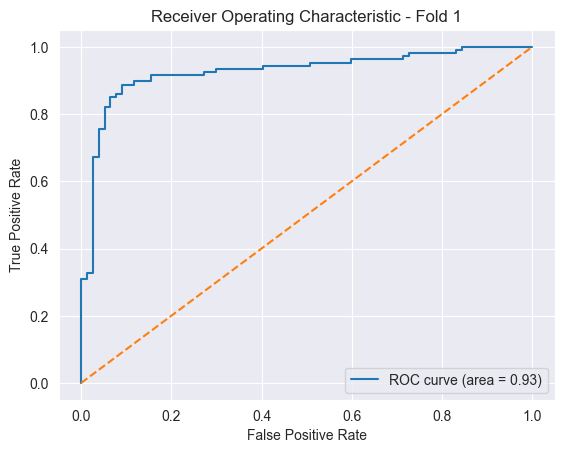

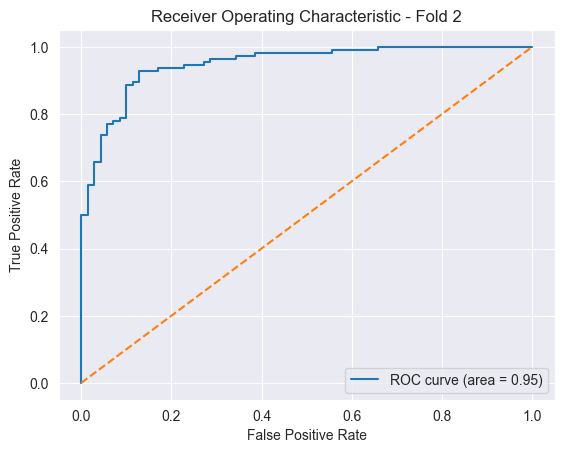

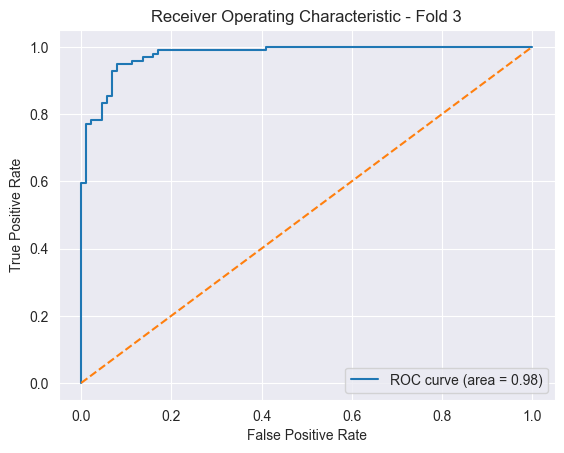

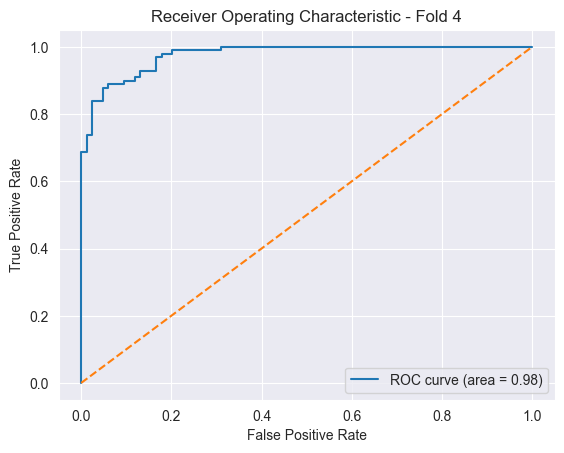

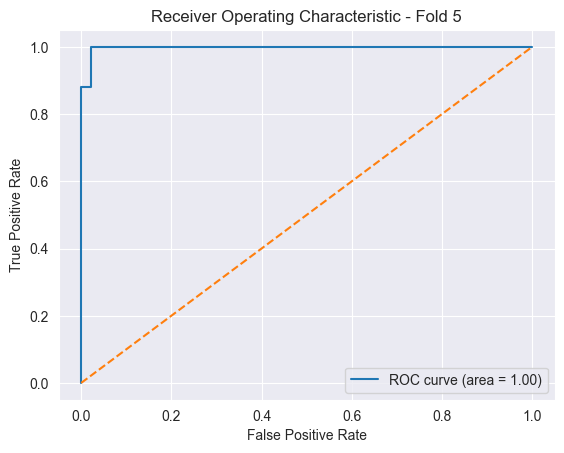

In [227]:
for n_fold in range(len(bm_arr_roc)):
    plot_roc(n_fold, bm_arr_roc[n_fold], bm_auc_scores[n_fold])

The plots that can be seen above show the development of the model in the course of time. It can be seen that model has already in fold 1 a very good performance. It has the chance of 93% to correctly distinguish  between the positive and negative class. In fold 2 the model is improving slightly. In fold 3 and 4 the model still performs very well and the AUC is close to 1. In the final fold has a AUC of 1.00 that means that the model has perfectly classified all positive examples of the fold. This could indicate already a overfitting. It is quite rare for a model to achieve perfect classification unless the data is very simple or the model were able to memorize the training data.

Now, lets have a look at the over all loss and accuracy of the validation data:

In [252]:
# print validation score of the model
print(f'Basline Model Loss: {bm_val_score[0]} Accuracy: {bm_val_score[1]}')

Basline Model Loss: 0.06293074041604996 Accuracy: 0.9726775884628296


The baselien model indicates a loss of roughly .63 and a accuracy. That is very good for a baseline model. This could indicate that the model is either generalizing well and not overfitting significantly.

In the next chapter three different approaches are evaluated different methods of overfitting the model. The aim is to identifiy the so called 'sweet spot' for number of hiddenlayers, layer capacity and number of epochs.

## 7 Scaling - Overfitting the Model

The aim of this section is to actively overfit the model to investigate the best parameters for the model architecture. This concerns mostly the numer of hidden layer, the number of neurons per layer and finally the number of epochs ( one epoch is a complete pass through of the trainings data).

In [292]:
def overfitting_layers(data, labels, max_hidden_layers= 5, batch_size= 5, verbose=0):

    """
    Trains and evaluates models with varying numbers of hidden layers, neurons, epochs.

    Parameters:
    data (numpy.ndarray): The input data used for training and validation.
    labels (numpy.ndarray): The target labels for the input data.
    max_hidden_layers (int): The maximum number of hidden layers to use for building models.
    epochs (int, optional): The number of epochs for training each model. Defaults to 20.
    batch_size (int, optional): The batch size for training each model. Defaults to 5.
    verbose (int, optional): Verbosity mode. 0 = silent, 1 = progress bar, etc. Defaults to 0.

    Returns:
    dict: A dictionary containing training and validation losses and accuracies, and model histories.
    """

    val_accuracies= []
    val_losses= []
    model_histories= []
    train_losses= []
    train_accuracies= []

    for i in range(max_hidden_layers):
        print(f'Build model with {i+1} hidden layer... \b')
        model= build_model(data.shape[1], n_hidden_layers=(i+1))
        # verbose is set to 'o' to get only summary information for the specific model
        print(f'Start training and validating the model with {i+1} layers... \b')
        arr_roc, auc_scores, val_score, history= train_binary_model(5, data, labels, model, max_epochs, batch_size, verbose)

        train_losses.append(history.history['loss'][-1])
        train_accuracies.append(history.history['accuracy'][-1])

        val_losses.append(val_score[0])
        val_accuracies.append(val_score[1])




    return {
        'train_losses': train_losses,
        'train_accuracies': train_accuracies,
        'val_losses': val_losses,
        'val_accuracies': val_accuracies,
        'model_histories': model_histories
    }

In [294]:
def overfitting_neurons(data, labels, ls_neurons, max_epochs=20, batch_size= 5, verbose=0):

    """
    Trains and evaluates models with varying numbers of hidden layers, neurons, epochs.

    Parameters:
    data (numpy.ndarray): The input data used for training and validation.
    labels (numpy.ndarray): The target labels for the input data.
    max_hidden_layers (int): The maximum number of hidden layers to use for building models.
    epochs (int, optional): The number of epochs for training each model. Defaults to 20.
    batch_size (int, optional): The batch size for training each model. Defaults to 5.
    verbose (int, optional): Verbosity mode. 0 = silent, 1 = progress bar, etc. Defaults to 0.

    Returns:
    dict: A dictionary containing training and validation losses and accuracies, and model histories.
    """

    val_accuracies= []
    val_losses= []
    model_histories= []
    train_losses= []
    train_accuracies= []

    for num_neurons in ls_neurons:
        print(f'Build model with {num_neurons} neurons per hidden layer... \b')
        model= build_model(data.shape[1], num_neurons= num_neurons)
        # verbose is set to 'o' to get only summary information for the specific model
        print(f'Start training and validating the model with {num_neurons} neurons per hidden layer... \b')
        arr_roc, auc_scores, val_score, history= train_binary_model(5, data, labels, model, epochs=max_epochs, batch_size= batch_size, verbose= verbose)

        train_losses.append(history.history['loss'][-1])
        train_accuracies.append(history.history['accuracy'][-1])

        val_losses.append(val_score[0])
        val_accuracies.append(val_score[1])




    return {
        'train_losses': train_losses,
        'train_accuracies': train_accuracies,
        'val_losses': val_losses,
        'val_accuracies': val_accuracies,
        'model_histories': model_histories
    }

In [329]:
def overfitting_epochs(data, labels, max_epochs, batch_size= 5, verbose=0):

    """
    Trains and evaluates models with varying numbers of hidden layers, neurons, epochs.

    Parameters:
    data (numpy.ndarray): The input data used for training and validation.
    labels (numpy.ndarray): The target labels for the input data.
    max_hidden_layers (int): The maximum number of hidden layers to use for building models.
    epochs (int, optional): The number of epochs for training each model. Defaults to 20.
    batch_size (int, optional): The batch size for training each model. Defaults to 5.
    verbose (int, optional): Verbosity mode. 0 = silent, 1 = progress bar, etc. Defaults to 0.

    Returns:
    dict: A dictionary containing training and validation losses and accuracies, and model histories.
    """

    val_accuracies= []
    val_losses= []
    model_histories= []
    train_losses= []
    train_accuracies= []

    for i in range(1, max_epochs):
        epochs= i
        print(f'Build model with {i} epochs... \b')
        model= build_model(data.shape[1])
        # verbose is set to 'o' to get only summary information for the specific model
        print(f'Start training and validating the model with {i} epochs... \b')
        arr_roc, auc_scores, val_score, history= train_binary_model(5, data, labels, model, epochs, batch_size, verbose)

        train_losses.append(history.history['loss'][-1])
        train_accuracies.append(history.history['accuracy'][-1])

        val_losses.append(val_score[0])
        val_accuracies.append(val_score[1])




    return {
        'train_losses': train_losses,
        'train_accuracies': train_accuracies,
        'val_losses': val_losses,
        'val_accuracies': val_accuracies,
        'model_histories': model_histories
    }

In [342]:
def plot_acc_loss(train_accuracies, val_accuracies, train_losses, val_losses, **kwargs):

    list_neurons= kwargs.get('list_neurons', None)
    num_epochs= kwargs.get('num_epochs', None)

    # set figure
    plt.figure(figsize=(12, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(range(len(train_accuracies)), train_accuracies, label='Training Accuracy')
    plt.plot(range(len(val_accuracies)), val_accuracies, label='Validation Accuracy')
    if list_neurons:
        plt.xticks(range(len(list_neurons)), list_neurons, rotation= 90)
        plt.xlabel('Number of Neurons per Layers')
    if num_epochs:
        plt.xticks(range(1, num_epochs), rotation= 90)
        plt.xlabel('Number of Epochs')
    else:
        plt.xticks(range(len(val_accuracies)))
        plt.xlabel('Number of Hidden Layers')
    plt.title('Training and Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
    plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
    if list_neurons:
        plt.xticks(range(len(list_neurons)), list_neurons, rotation= 90)
        plt.xlabel('Number of Neurons per Layers')
    if num_epochs:
        plt.xticks(range(1, num_epochs), rotation= 90)
        plt.xlabel('Number of Epochs')
    else:
        plt.xticks(range(len(val_accuracies)))
        plt.xlabel('Number of Hidden Layers')
    plt.title('Training and Validation Loss')

    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


### Overfitting Layers

In [268]:
results= overfitting_layers(data, labels, 20)

Build model with 1 hidden layer...
Start training and validating the model with 1 layers...
6/6 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.8913
Validation Score [0.29841846227645874, 0.8913043737411499]
6/6 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.8533
Validation Score [0.3988204598426819, 0.85326087474823]
6/6 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9185
Validation Score [0.20821407437324524, 0.91847825050354]
6/6 [==============================] - 0s 2ms/step - loss: 0.2755 - accuracy: 0.8798
Validation Score [0.275516539812088, 0.8797814249992371]
6/6 [==============================] - 0s 3ms/step - loss: 0.1121 - accuracy: 0.9563
Validation Score [0.11214686930179596, 0.9562841653823853]
Build model with 2 hidden layer...
Start training and validating the model with 2 layers...
6/6 [==============================] - 1s 5ms/step - loss: 0.4489 - accuracy: 0.8370
Validation Score [

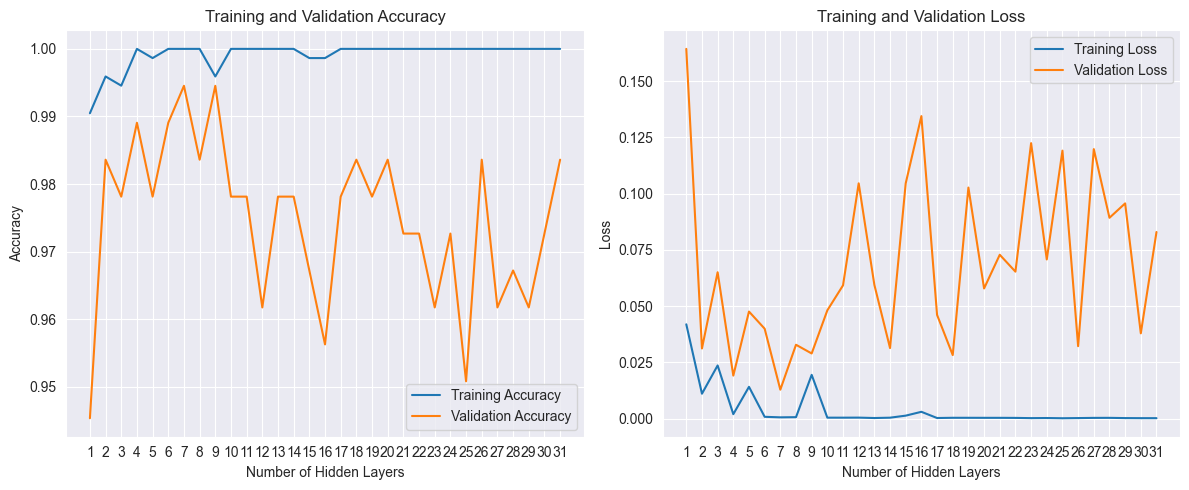

In [301]:
plot_acc_loss(results['train_accuracies'], results['val_accuracies'], results['train_losses'], results['val_losses'])

### Train model with bigger
das


In [296]:
ls_num_neurons= list(range(32, 1024, 32))
results= overfitting_neurons(data, labels, ls_num_neurons, batch_size= 5, verbose=0)

Build model with 32 neurons per hidden layer...
Start training and validating the model with 32 neurons per hidden layer...
6/6 [==============================] - 0s 2ms/step - loss: 0.2911 - accuracy: 0.8967
Validation Score [0.29113534092903137, 0.89673912525177]
6/6 [==============================] - 0s 2ms/step - loss: 0.2703 - accuracy: 0.8859
Validation Score [0.2702949643135071, 0.885869562625885]
6/6 [==============================] - 0s 2ms/step - loss: 0.2265 - accuracy: 0.9185
Validation Score [0.2264598160982132, 0.91847825050354]
6/6 [==============================] - 0s 2ms/step - loss: 0.3319 - accuracy: 0.8907
Validation Score [0.3319452106952667, 0.8907103538513184]
6/6 [==============================] - 0s 2ms/step - loss: 0.1644 - accuracy: 0.9454
Validation Score [0.1643543541431427, 0.9453551769256592]
Build model with 64 neurons per hidden layer...
Start training and validating the model with 64 neurons per hidden layer...
6/6 [==============================] - 0s

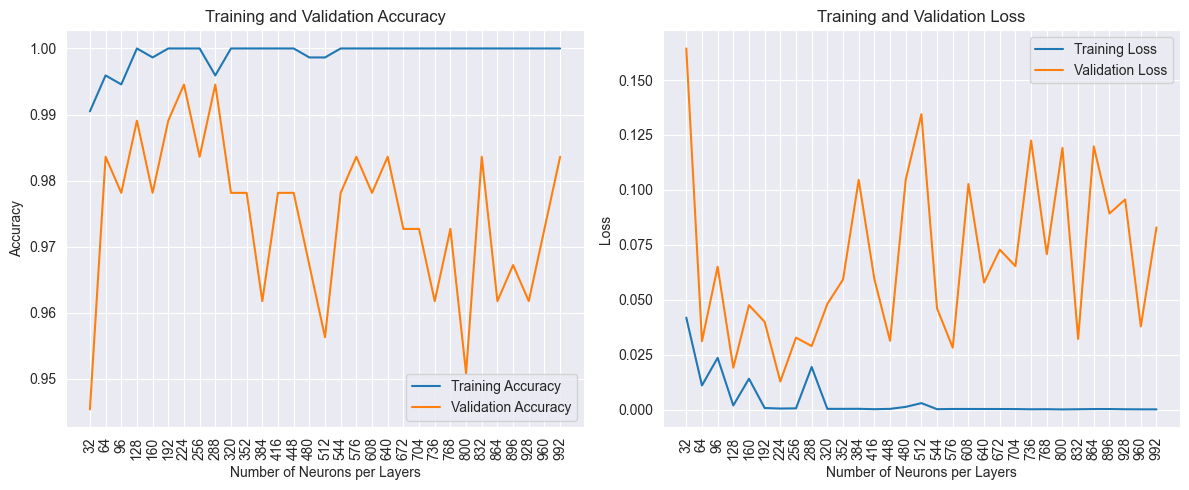

In [318]:
plot_acc_loss(results['train_accuracies'], results['val_accuracies'], results['train_losses'], results['val_losses'], list_neurons= ls_num_neurons)

### Train for more epochs

In [338]:
max_epochs= 100
results= overfitting_epochs(data, labels, max_epochs, batch_size=50, verbose=1)

Build model with 1 epochs...
Start training and validating the model with 1 epochs...
6/6 [==============================] - 0s 2ms/step - loss: 0.6064 - accuracy: 0.6250
Validation Score [0.6063982248306274, 0.625]
6/6 [==============================] - 0s 2ms/step - loss: 0.5057 - accuracy: 0.8098
Validation Score [0.5056794285774231, 0.8097826242446899]
6/6 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.8533
Validation Score [0.4334799349308014, 0.85326087474823]
6/6 [==============================] - 0s 25ms/step - loss: 0.4550 - accuracy: 0.7923
Validation Score [0.4549817442893982, 0.7923497557640076]
6/6 [==============================] - 0s 2ms/step - loss: 0.3613 - accuracy: 0.8798
Validation Score [0.3612622618675232, 0.8797814249992371]
Build model with 2 epochs...
Start training and validating the model with 2 epochs...
Epoch 1/2
15/15 [==============================] - 1s 2ms/step - loss: 0.6571 - accuracy: 0.6431
Epoch 2/2
6/6 [===============

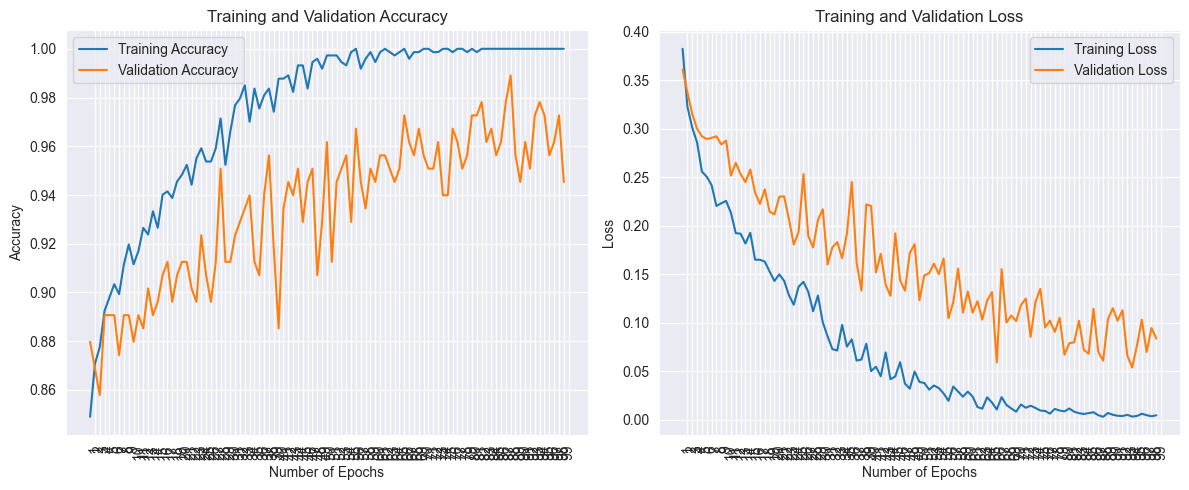

In [343]:
plot_acc_loss(results['train_accuracies'], results['val_accuracies'], results['train_losses'], results['val_losses'], num_epochs= max_epochs)

## 8 Regularize Model and Hyperparamter Tuning

In [347]:
tuned_model= build_model(data.shape[1], 128, 'relu', n_hidden_layers= 5)
tm_arr_roc, tm_auc_scores, tm_val_score, tm_history= train_binary_model(5,data, labels, tuned_model, 60, 32, 1)


Epoch 1/60
23/23 [==============================] - 2s 2ms/step - loss: 0.5271 - accuracy: 0.7316
Epoch 2/60
23/23 [==============================] - 0s 2ms/step - loss: 0.3384 - accuracy: 0.8638
Epoch 3/60
23/23 [==============================] - 0s 2ms/step - loss: 0.2973 - accuracy: 0.8883
Epoch 4/60
23/23 [==============================] - 0s 2ms/step - loss: 0.2807 - accuracy: 0.8883
Epoch 5/60
23/23 [==============================] - 0s 2ms/step - loss: 0.2476 - accuracy: 0.9033
Epoch 6/60
23/23 [==============================] - 0s 3ms/step - loss: 0.2259 - accuracy: 0.9060
Epoch 7/60
23/23 [==============================] - 0s 2ms/step - loss: 0.2002 - accuracy: 0.9264
Epoch 8/60
23/23 [==============================] - 0s 2ms/step - loss: 0.1895 - accuracy: 0.9251
Epoch 9/60
23/23 [==============================] - 0s 2ms/step - loss: 0.1720 - accuracy: 0.9346
Epoch 10/60
23/23 [==============================] - 0s 2ms/step - loss: 0.1366 - accuracy: 0.9482
Epoch 11/60
23/23 [

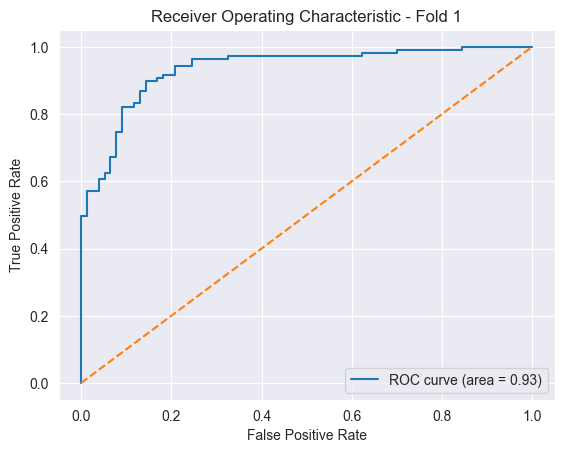

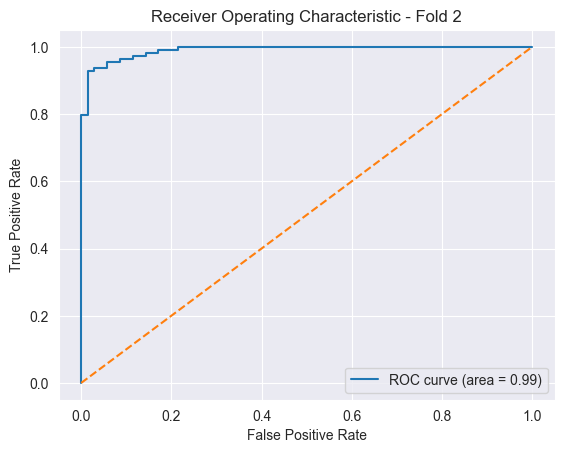

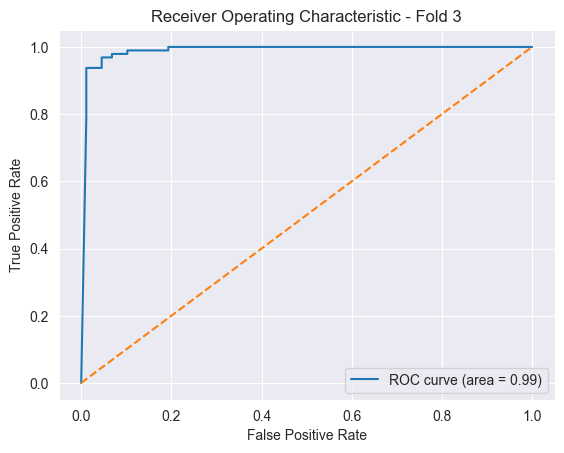

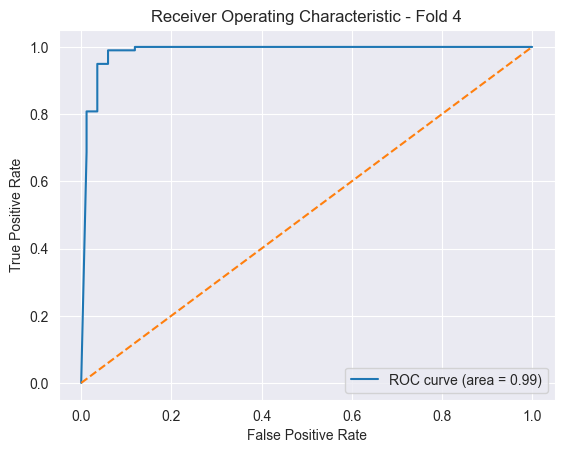

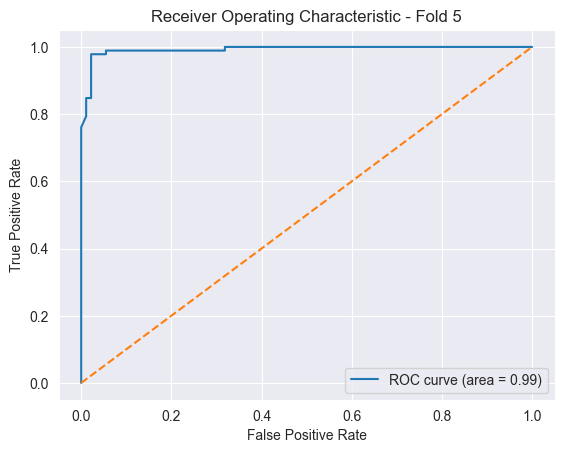

In [348]:
for n_fold in range(len(tm_arr_roc)):
    plot_roc(n_fold, tm_arr_roc[n_fold], tm_auc_scores[n_fold])

In [364]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.neural_network import MLPClassifier  # Example model
from sklearn.datasets import make_classification



# Define the model to be used
model = KerasClassifier(build_fn=build_model, verbose=0)

# Define the grid of hyperparameters to search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Set up GridSearchCV with the model and hyperparameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5, scoring='accuracy')

# Perform the grid search on the data
grid_search.fit(data, labels)

# Get the best model
best_model = grid_search.best_estimator_

# Print out the best hyperparameters
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best score achieved: {grid_search.best_score_}")


AttributeError: type object 'Sequential' has no attribute 'predict_classes'

# References

- Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction